In [3]:
%store -r fbp0_ct05s_100 fbp2_ct05s_100 fbp4_ct05s_100 fbp8_ct05s_100

In [ ]:
fbp

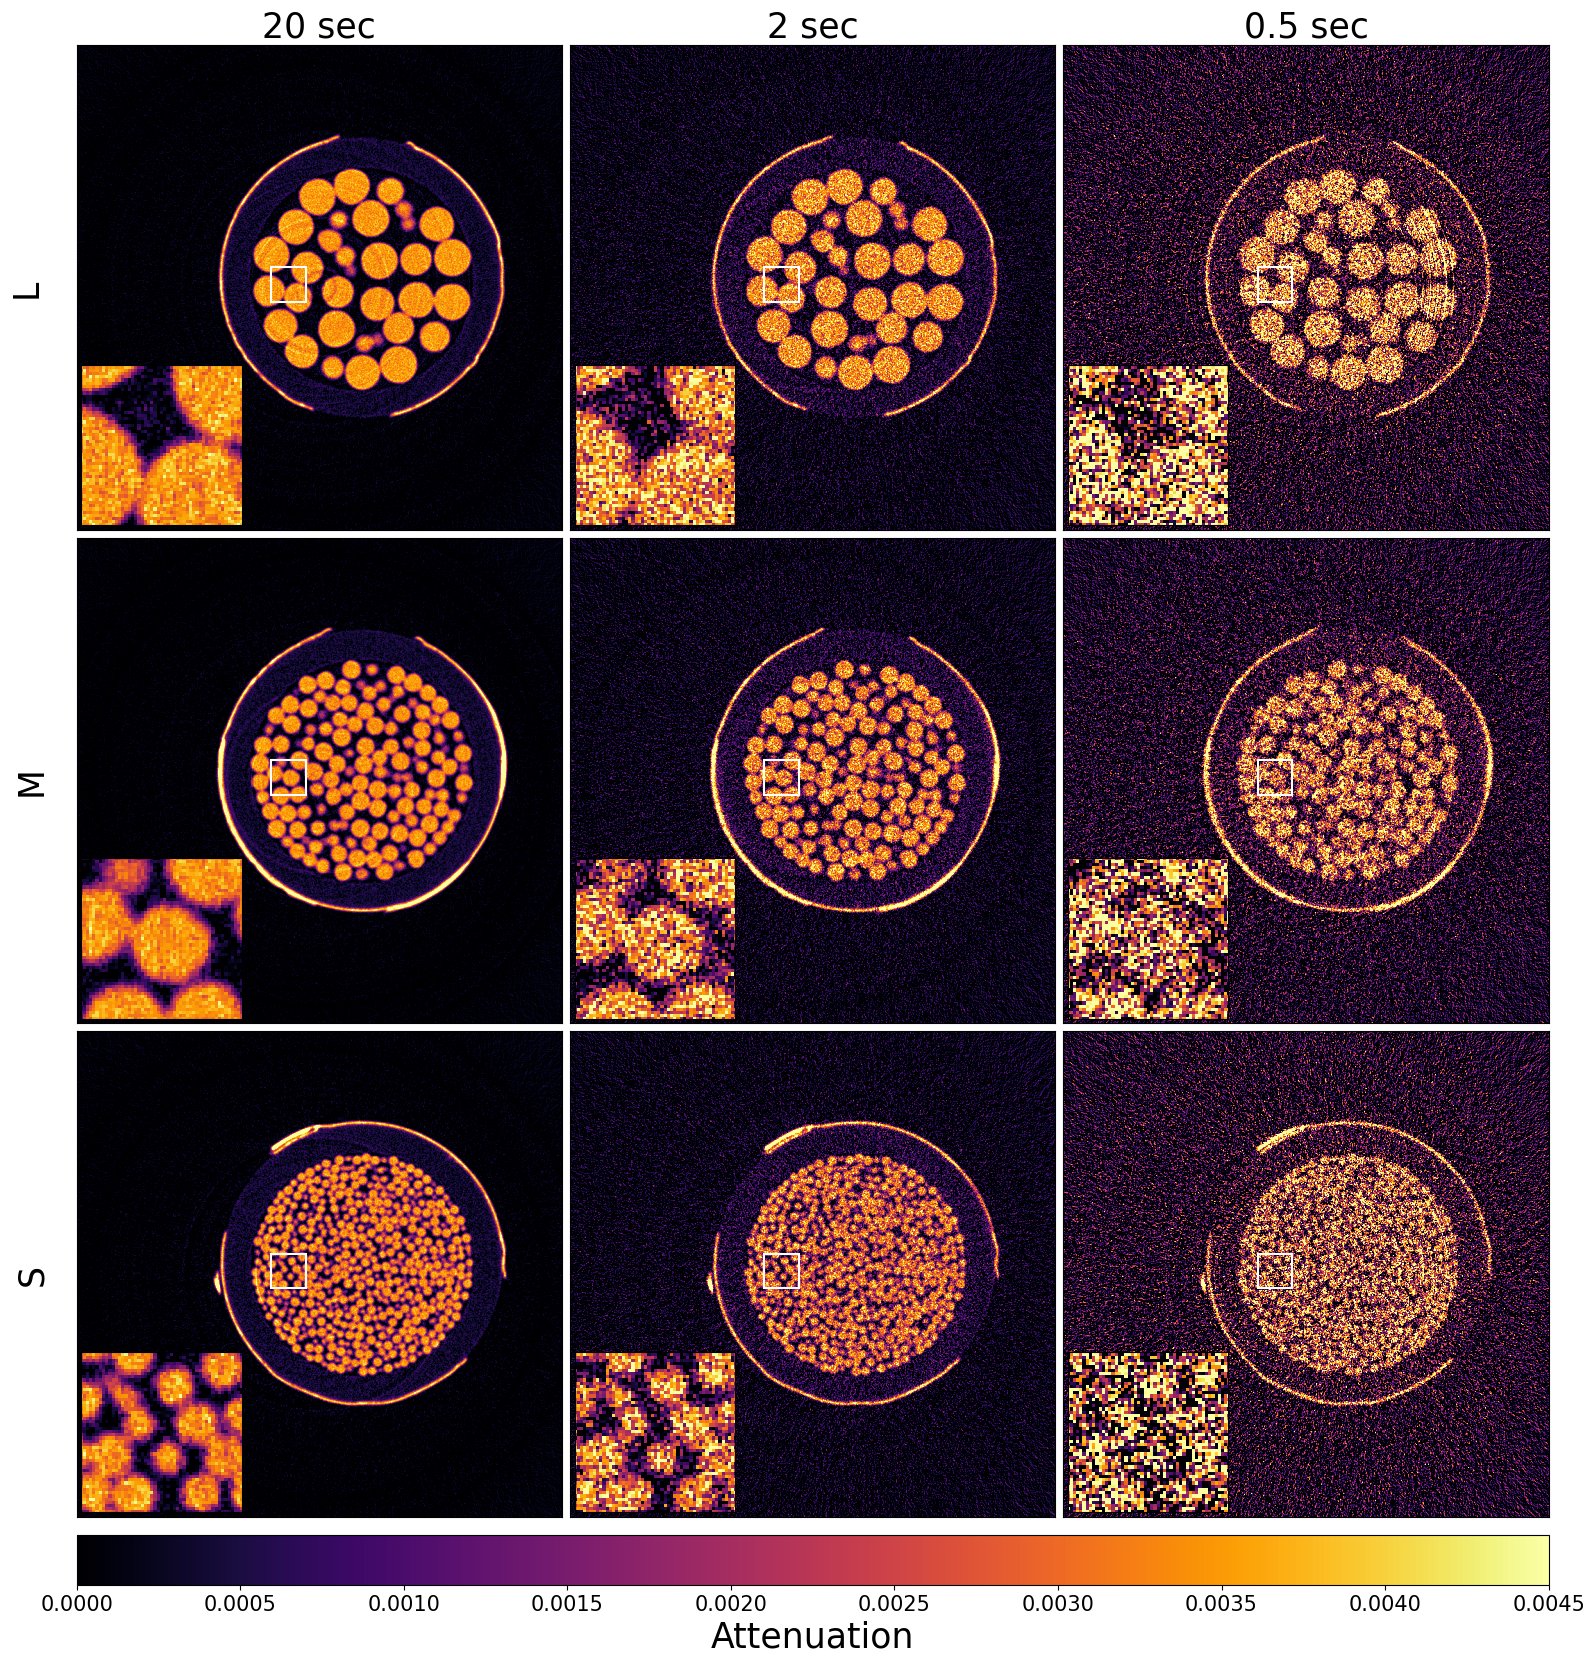

In [5]:
### Show fbp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib.patches as patches


recons = [fbp0_ct20s_600.as_array(), fbp0_ct2s_600.as_array(), fbp0_ct05s_600.as_array(),
          fbp0_ct20s_400.as_array(), fbp0_ct2s_400.as_array(), fbp0_ct05s_400.as_array(),
          fbp0_ct20s_100.as_array(), fbp0_ct2s_100.as_array(), fbp0_ct05s_100.as_array(),
         ]

labels_x = ["20 sec", "2 sec", "0.5 sec"]
labels_y = ["L", "M", "S"]

# set fontszie xticks/yticks
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

fig = plt.figure(figsize=(20, 20))

grid = AxesGrid(fig, 111,
                nrows_ncols=(3, 3),
                axes_pad=0.08,
                cbar_mode='single',
                cbar_location='bottom',
                cbar_size = 0.5,
                cbar_pad=0.1
                )

k = 0

for ax in grid:
    im = ax.imshow(recons[k],vmin=0,vmax=0.0045, cmap="inferno")
    
    axins = zoomed_inset_axes(ax, 3, loc=2)
    ip = InsetPosition(ax, [0.01, 0.01, 0.33, 0.33]) #posx, posy, width, height
    axins.set_axes_locator(ip)
    axins.imshow(recons[k], vmin=0, vmax=0.0045, interpolation="none", cmap='inferno')

    x1, x2, y1, y2 = 280,330, 320, 370
    axins.set_xlim(x1, x2)
    axins.set_ylim(y2, y1)
    axins.tick_params(axis='both', which='both', left=False, top=False, bottom=False)
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    rect = patches.Rectangle((x1, y1), 50, 50, linewidth=1.5, edgecolor='w', facecolor='none')
    ax.add_patch(rect)   
    
        
    # for the horizontal slice
    if k==0:
        ax.set_title(labels_x[0],fontsize=25)
        ax.set_ylabel(labels_y[0],fontsize=25, labelpad=20)
        
        #scalebar = AnchoredSizeBar(ax.transData,
        #                           44.13, '5 mm', 'lower right', 
        #                           pad=0.5,
        #                           color='white',
        #                           frameon=False,
        #                           size_vertical=5)

        #ax.add_artist(scalebar)        

        
    if k==1:
        ax.set_title(labels_x[1],fontsize=25)
    if k==2:
        ax.set_title(labels_x[2],fontsize=25)
    #if k==3:        
    #   ax.set_title(labels_x[3],fontsize=25)
        
    if k==3:        
        ax.set_ylabel(labels_y[1],fontsize=25, labelpad=20) 
        
    if k==6:        
        ax.set_ylabel(labels_y[2],fontsize=25, labelpad=20)  
        
    if k!=0:
        ax.tick_params(axis='both', which='both', 
                           left=False, bottom=False, top=False) 
    k+=1

    ax.set_xticks([])
    ax.set_yticks([]) 
   
cbar = ax.cax.colorbar(im)
cbar.ax.set_xlabel('Attenuation', fontsize=25)


plt.show()